In [298]:
import numpy as np
import pandas as pd


# Import Data


In [299]:
#I replaced A1-A16 with the actual feature names 
filepath = 'credit-approval.csv'
data = pd.read_csv(filepath)

In [300]:
data.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [301]:
data.dtypes.value_counts()

object     10
float64     4
int64       2
dtype: int64

In [302]:
#Need to encode categorical data into numeric data
#First, only look at the features with categorical data
object_data =data.select_dtypes(include=['object'])
object_data.head()

,Gender,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,Approved
0,b,u,g,w,v,t,t,f,g,+
1,a,u,g,q,h,t,t,f,g,+
2,a,u,g,q,h,t,f,f,g,+
3,b,u,g,w,v,t,t,t,g,+
4,b,u,g,w,v,t,f,f,s,+


In [303]:
# Determine how many extra columns would be created with one-hot encoding
object_data =pd.get_dummies(object_data)
object_data.head()

,Gender_a,Gender_b,Married_l,Married_u,Married_y,BankCustomer_g,BankCustomer_gg,BankCustomer_p,EducationLevel_aa,EducationLevel_c,...,PriorDefault_t,Employed_f,Employed_t,DriversLicense_f,DriversLicense_t,Citizen_g,Citizen_p,Citizen_s,Approved_+,Approved_-
0,0,1,0,1,0,1,0,0,0,0,...,1,0,1,1,0,1,0,0,1,0
1,1,0,0,1,0,1,0,0,0,0,...,1,0,1,1,0,1,0,0,1,0
2,1,0,0,1,0,1,0,0,0,0,...,1,1,0,1,0,1,0,0,1,0
3,0,1,0,1,0,1,0,0,0,0,...,1,0,1,0,1,1,0,0,1,0
4,0,1,0,1,0,1,0,0,0,0,...,1,1,0,1,0,0,0,1,1,0


In [304]:
#Since one-hot encoding creates many extra colums, use label encoding instead

# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le=LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in data.columns.values:
    # Compare if the dtype is object
    if data[col].dtype=='object':
    # Use LabelEncoder to do the numeric transformation
        data[col]=le.fit_transform(data[col].astype(str))


In [305]:
#inspect if the label encoding was successful
data.head(10)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,2,0,13,8,1.250,1,1,1,0,0,202.0,0,0
1,0,58.67,4.460,2,0,11,3,3.040,1,1,6,0,0,43.0,560,0
2,0,24.50,0.500,2,0,11,3,1.500,1,0,0,0,0,280.0,824,0
3,1,27.83,1.540,2,0,13,8,3.750,1,1,5,1,0,100.0,3,0
4,1,20.17,5.625,2,0,13,8,1.710,1,0,0,0,2,120.0,0,0
5,1,32.08,4.000,2,0,9,8,2.500,1,0,0,1,0,360.0,0,0
6,1,33.17,1.040,2,0,12,3,6.500,1,0,0,1,0,164.0,31285,0
7,0,22.92,11.585,2,0,2,8,0.040,1,0,0,0,0,80.0,1349,0
8,1,54.42,0.500,3,3,8,3,3.960,1,0,0,0,0,180.0,314,0
9,1,42.50,4.915,3,3,13,8,3.165,1,0,0,1,0,52.0,1442,0


# Explore some of the numeric data with visuals
Used histograms to get insight into the distribution of some of the features. Knowing the distribution can help determine if the data is skewed.


Text(0, 0.5, 'Frequency')

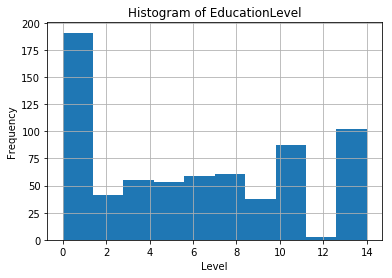

In [306]:
#Explore the numeric data with visuals
import pylab as pl
from pandas import *

data['EducationLevel'].hist()
pl.title("Histogram of EducationLevel")
pl.xlabel("Level")
pl.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

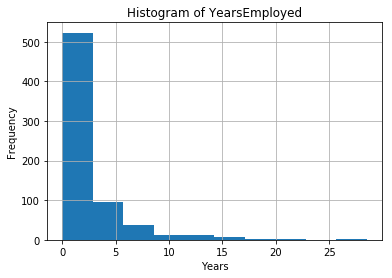

In [307]:
data['YearsEmployed'].hist()
pl.title("Histogram of YearsEmployed")
pl.xlabel("Years")
pl.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

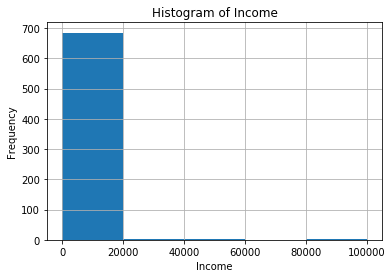

In [308]:
data['Income'].hist(bins=5)
pl.title("Histogram of Income")
pl.xlabel("Income")
pl.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

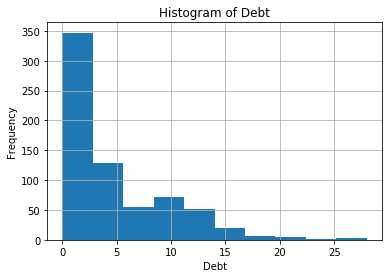

In [309]:
data['Debt'].hist(bins=10)
pl.title("Histogram of Debt")
pl.xlabel("Debt")
pl.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

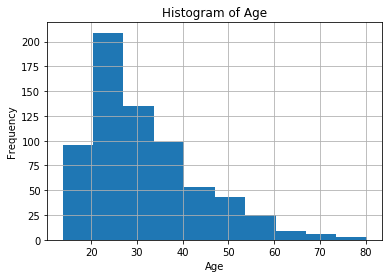

In [310]:
data['Age'].hist()
pl.title("Histogram of Age")
pl.xlabel("Age")
pl.ylabel("Frequency")

# Apply logistic regression to predict the class variable A16 and report the classification accuracy
A16 is the approval column

In [311]:
#need to replace the Nan data to run regression
data.fillna(data.mean(), inplace=True)

In [312]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Seperate features and labels into x,y variables
X = data.drop('Approved', axis=1)
y = data['Approved']
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [313]:
# Import MinMaxScaler
from sklearn.preprocessing import  MinMaxScaler

# rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

C:\Users\Shmuel Weinfeld\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Shmuel Weinfeld\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [314]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [315]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledX_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [317]:
# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

# Get the accuracy score of logistic regression model 
from sklearn.metrics import accuracy_score

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8260869565217391


# Run an SVM model on the data

In [318]:
from sklearn import svm

In [319]:
X = data.drop(['Approved', 'ZipCode', 'DriversLicense'], axis = 1)
y = data['Approved']
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state= 30)

In [320]:
# Import MinMaxScaler
from sklearn.preprocessing import  MinMaxScaler

# rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

C:\Users\Shmuel Weinfeld\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Shmuel Weinfeld\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [321]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 30)
classifier.fit(X_train, y_train)

#Predicting the Test Set
y_pred = classifier.predict(X_test)

In [322]:
from sklearn import metrics

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6884057971014492


# Apply random forests to predict the class variable A16 and report the classification accuracy

In [323]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 2)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [324]:
# Predicting the test set result
y_pred = model.predict(X_test)

In [325]:
# Getting the score for our model
from sklearn.metrics import accuracy_score
metrics.accuracy_score(y_test, y_pred)

0.9057971014492754